# DATA COLLECTION AND EXTRACTION

## Importing libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn import svm


In [2]:
train = pd.read_csv('C:\\Users\\samuel\\Documents\\kaggle_titanic\\train.csv')
test = pd.read_csv('C:\\Users\\samuel\\Documents\\kaggle_titanic\\test.csv')
example_sub = pd.read_csv('C:\\Users\\samuel\\Documents\\kaggle_titanic\\gender_submission.csv')

In [3]:
train.shape ,test.shape, example_sub.shape

((891, 12), (418, 11), (418, 2))

## view and review the train data format

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# fill the null values 

try removing the missing values in the Embarked column and also replace the missing values in the age column with the median
Also , we will have to remove the cabin column since we don't really have any need for it.

In [7]:

train.Age.fillna(train.Age.median(), inplace=True)
train.drop(columns=['Cabin','Name'],inplace=True)
train.Embarked.fillna('C',inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [8]:
train.duplicated().sum()

0

# FEATURE ENGINEERING

In [9]:
train.Sex = pd.get_dummies(train.Sex).male # so male stands for 1 and female 0

S    644
C    170
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

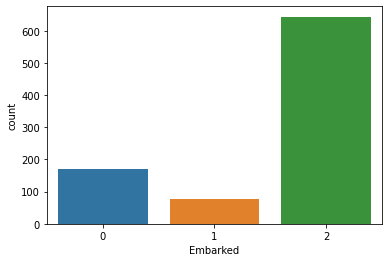

In [10]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
print(train.Embarked.value_counts())
Embarked_encoded = le.fit_transform(train.Embarked)
train.Embarked = Embarked_encoded

sns.countplot(data=train,x='Embarked')

before we proceed we will have to apply all the feature engineering we did on the training set on the testing set as well.

In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:

test.Age.fillna(test.Age.median(), inplace=True)
test.drop(columns=['Cabin','Name'],inplace=True)

# using label encoding for the sex and the Embarked column
test.Sex = le.fit_transform(test.Sex)
test.Embarked = le.fit_transform(test.Embarked)
test.Fare.fillna(test.Fare.mean(),inplace=True)
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 26.2+ KB


In [13]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1,34.5,0,0,330911,7.8292,1
1,893,3,0,47.0,1,0,363272,7.0000,2
2,894,2,1,62.0,0,0,240276,9.6875,1
3,895,3,1,27.0,0,0,315154,8.6625,2
4,896,3,0,22.0,1,1,3101298,12.2875,2


# MODELLING

In [71]:
X = train[['Pclass', 'Sex', 'Age','SibSp','Parch','Ticket','Fare','Embarked']]
y = train.Survived
#sns.pairplot(data=train, hue=train.Survived,dropna=True,height=3)
# pd.plotting.scatter_matrix(X,c=y,alpha=.8,cmap='Set1',figsize=(30,15))
# plt.show()

In [55]:
# split the model into training and testing halves
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 234,stratify=y,train_size = .7)

for parts in X_train,X_test,y_train,y_test:
    print(f'{parts.shape}')
    print(parts.value_counts())
    
# print(X_train.value_counts())

(623, 4)
Pclass  Sex  Age   Fare   
3       1    28.0  7.8958     10
                   7.7500      8
                   8.0500      7
        0    28.0  7.7500      5
        1    28.0  7.2292      4
                              ..
2       0    28.0  33.0000     1
                   26.0000     1
                   13.0000     1
                   12.3500     1
3       1    74.0  7.7750      1
Length: 538, dtype: int64
(268, 4)
Pclass  Sex  Age   Fare   
3       1    28.0  7.8958     7
                   8.0500     5
        0    28.0  7.7500     4
        1    19.0  7.8958     3
             28.0  7.7500     3
                             ..
2       1    1.0   37.0042    1
                   39.0000    1
             16.0  26.0000    1
             21.0  11.5000    1
3       1    51.0  7.7500     1
Length: 242, dtype: int64
(623,)
0    384
1    239
Name: Survived, dtype: int64
(268,)
0    165
1    103
Name: Survived, dtype: int64


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Logistic Model accuracy:', metrics.accuracy_score(y_test, y_pred))
print('\n', metrics.classification_report(y_test,y_pred))

Logistic Model accuracy: 0.7947761194029851

               precision    recall  f1-score   support

           0       0.81      0.87      0.84       165
           1       0.77      0.67      0.72       103

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [60]:
metrics.confusion_matrix(y_test,y_pred)

array([[144,  21],
       [ 34,  69]], dtype=int64)

### saving the model into a submission file


In [64]:
def save(model, file_name):
    # example_sub.describe()
    sub_file = test[['PassengerId']]  # creates a submission dataframe;
    test_inputs = test[['Pclass', 'Sex', 'Age','Fare']]
    sub_file_predictions = model.predict(test_inputs)
    print(sub_file_predictions)
    sub_file['Survived'] = sub_file_predictions

    sub_file.to_csv(file_name, index=False)
    print(f'File saved at {os.getcwd()}\\{file_name}')

In [65]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print(metrics.classification_report(y_test, rf_predictions))
print()
print('Arrangement of the important features that make up the model')
print(dict(zip(X.columns,rf.feature_importances_)))


              precision    recall  f1-score   support

           0       0.79      0.93      0.86       165
           1       0.85      0.61      0.71       103

    accuracy                           0.81       268
   macro avg       0.82      0.77      0.78       268
weighted avg       0.82      0.81      0.80       268


Arrangement of the important features that make up the model
{'Pclass': 0.19508445480534717, 'Sex': 0.429229835203547, 'Age': 0.14651699179636843, 'Fare': 0.22916871819473744}


In [66]:
save(rf,'random-forest-submission2.csv')

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
File saved at C:\Users\samuel\Documents\kaggle_titanic\random-forest-submission2.csv


# HYPERPARAMETER TUNING

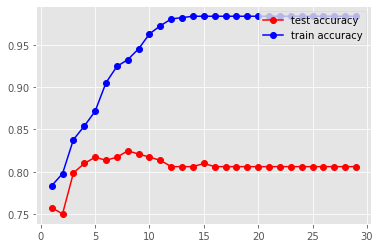

In [67]:
test_accuracy,train_accuracy = [],[]
depths = np.arange(1,30)
for i in depths:
    model = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=i)
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))
    
plt.style.use('ggplot')    
plt.plot(depths,test_accuracy,marker='o',c='red',label='test accuracy')
plt.plot(depths,train_accuracy,marker='o',c='blue',label='train accuracy')
plt.legend(loc='upper right')

    

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train,y_train)
ada_preds = ada.predict(X_test)
metrics.classification_report(y_test,ada_preds)

'              precision    recall  f1-score   support\n\n           0       0.81      0.85      0.83       165\n           1       0.74      0.69      0.71       103\n\n    accuracy                           0.79       268\n   macro avg       0.78      0.77      0.77       268\nweighted avg       0.79      0.79      0.79       268\n'

In [69]:
save(ada,'ada-boost.csv')

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
File saved at C:\Users\samuel\Documents\kaggle_titanic\ada-boost.csv


In [70]:
save(logreg,'logreg1.csv')

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
File saved at C:\Users\samuel\Documents\kaggle_titanic\logreg1.csv
